# Model Inference
---

##  Objective : 
Program ini bertujuan melakukan inference model computer vision atas pelatihan sebelumnya dari model yang terbaik, terhadap data baru yang belum pernah dibuat.

## Import Libraries

In [50]:
# Import Library
from google.colab import drive
from tensorflow.keras.models import load_model
from tensorflow_hub.keras_layer import KerasLayer
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Load Model

In [51]:
# connect to drive
drive.mount('/content/drive')

# define path
model_path = '/content/drive/MyDrive/CVision/model_tl.keras'

# load model
model = load_model(model_path, custom_objects={'KerasLayer': KerasLayer})

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Inference

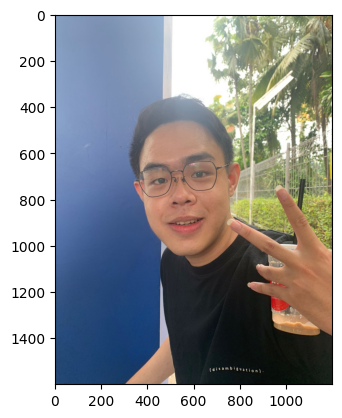

In [52]:
# set path
path_to_image = '/content/drive/MyDrive/CVision/josh.jpg'

# read
image = Image.open(path_to_image)

# show image
plt.imshow(image)
plt.show()

## Prediction

In [53]:
# function to load and predict
def import_and_predict(path, model):
        image = load_img(path, target_size=(224, 224))
        img_array = img_to_array(image)
        img_array = tf.expand_dims(img_array, 0)  # Create a batch

        # Normalize the image
        img_array = img_array / 255.0

        # Make prediction
        predictions = model.predict(img_array)

        # Get the class with the highest probability
        idx = np.where(predictions > 0.5, 1, 0).item()

        jenis = ['not safety', 'safety']
        result = f"Prediction: {jenis[idx]}"

        return result

In [54]:
import_and_predict(path_to_image, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


'Prediction: not safety'

Melakukan load image dan menyeragamkan ukuran piksel menjadi 224, 224, lalu melakukan predict terhadap file yang diload. Hasil prediksi adalah `not safety` karena tidak menggunakan safety gear untuk keselamatan kerja.

## Kesimpulan

Dari hasil diatas, dapat diamati bahwa model melakukan prediksi terhadap data yang baru dilihat berdasarkan pembelajaran sebelumnya berdasarkan kriteria dari fitur-fiturnya. Data baru dikenali sebagai kategori not safety atau tidak menggunakan safety gear.